In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import BoxLeastSquares
import scipy.signal
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from lightkurve import search_lightcurve
import transitFinderFunctions as courseworkb
import importlib


# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)


<module 'transitFinderFunctions' from '/home/olivermcevoy/AstroCourseworkB/transitFinderFunctions.py'>

In [2]:
target =  'Kepler-11'
kepler_dataframe_not_nice, stellar_data = courseworkb.fetch_kepler_data_and_stellar_info_normalise_entire_curve(target)

file_path = 'CourseworkData/Objectlc'
kepler_dataframe = courseworkb.loadDataFromFitsFiles(file_path)


4375 4375 4375ght curve segment 62 of 62
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780


In [3]:
cursed_list = []
for i in range(1, 10):

    if i % 2 == 0:    
        print(f"Running iteration {i}", end='\r')
    kepler_dataframe_tmp = courseworkb.loadDataFromFitsFiles(file_path,filter_type='savgol', randomise=True)
    cursed_list.append(kepler_dataframe_tmp)

lightcurve_1 = cursed_list[0]
print(lightcurve_1.head())

4375 4375 4375
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780
4375 4375 4375ion 2
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780
4375 4375 4375
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780
4375 4375 4375ion 4
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370


In [4]:
print(len(kepler_dataframe['flux']))
print(len(kepler_dataframe_not_nice['flux']))

64464
1899237


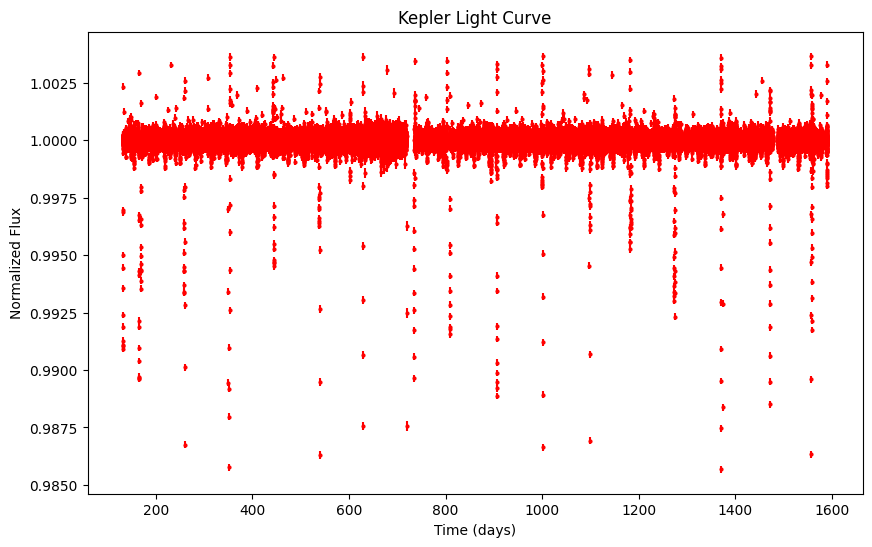

In [5]:
courseworkb.plot_light_curve(kepler_dataframe['time'], kepler_dataframe['flux'], kepler_dataframe['error'])

Running Lomb-Scargle Periodogram Analysis...


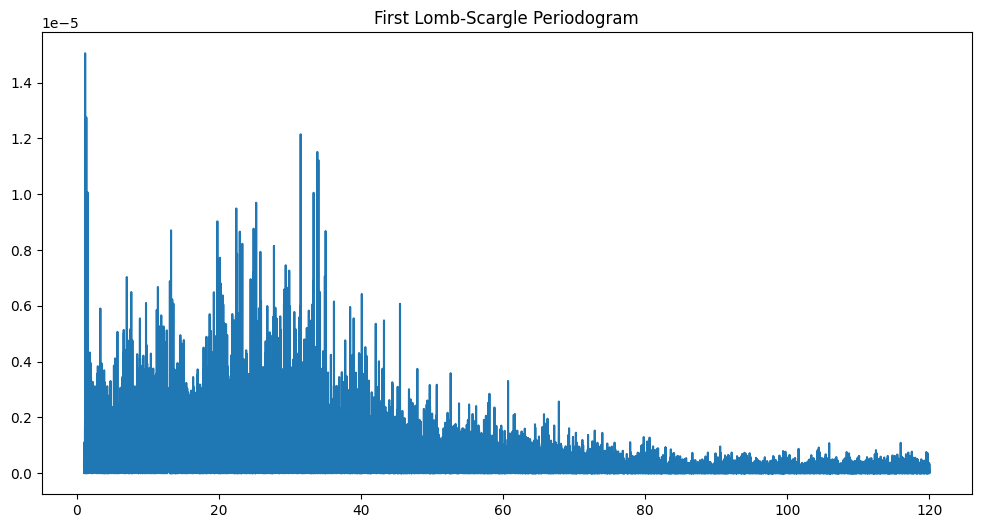

computing second periodogram
List of random light curves present, computing random light curves


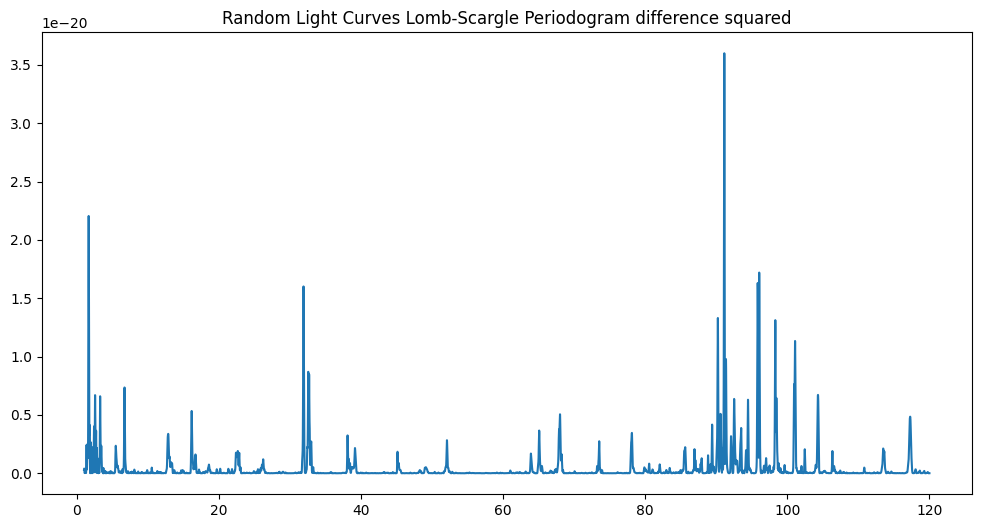

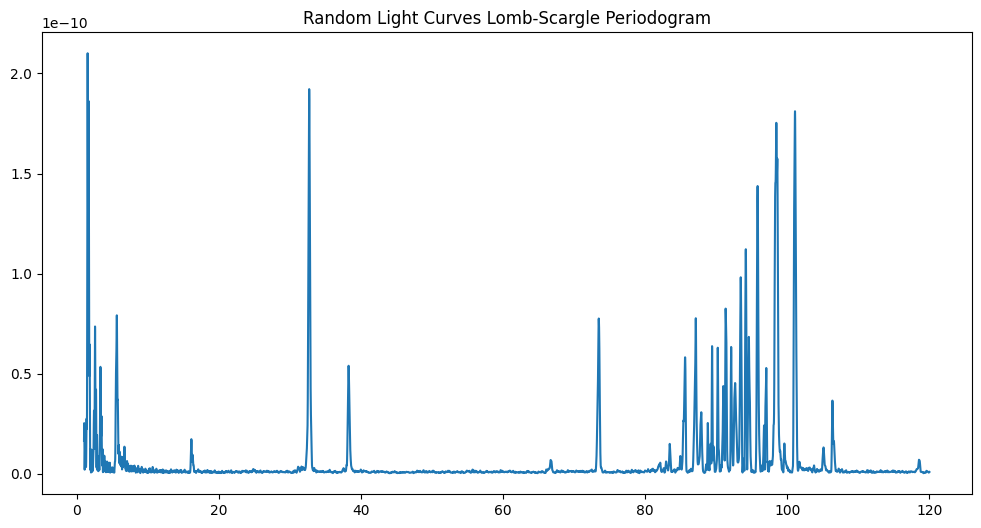

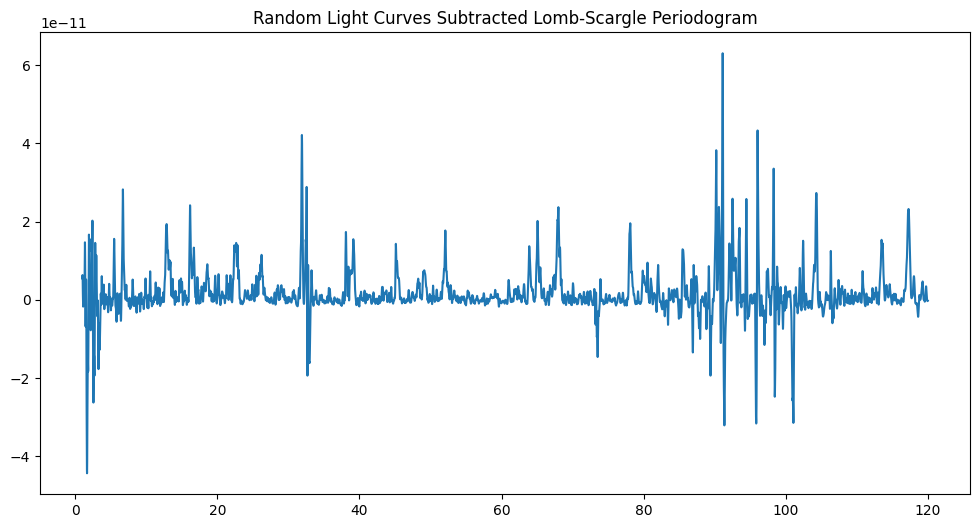

Gradient Threshold: 7.43e-21, Second Derivative Threshold: 1.81e-18


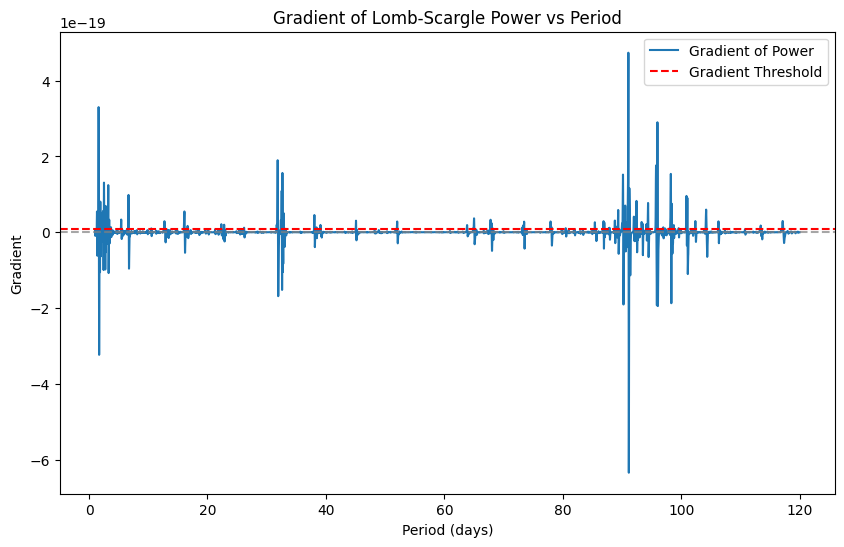

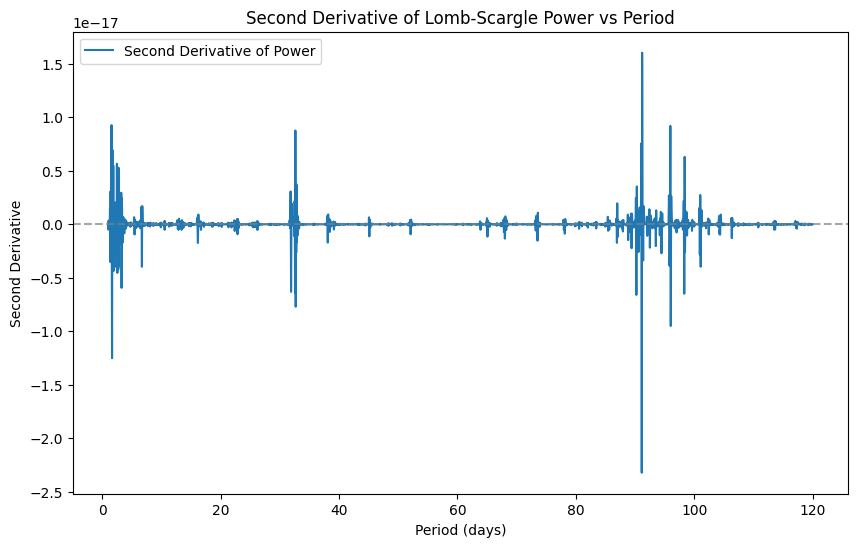

Excluding peaks before period = 1.00 days
Lomb-Scargle Periodogram analysis done


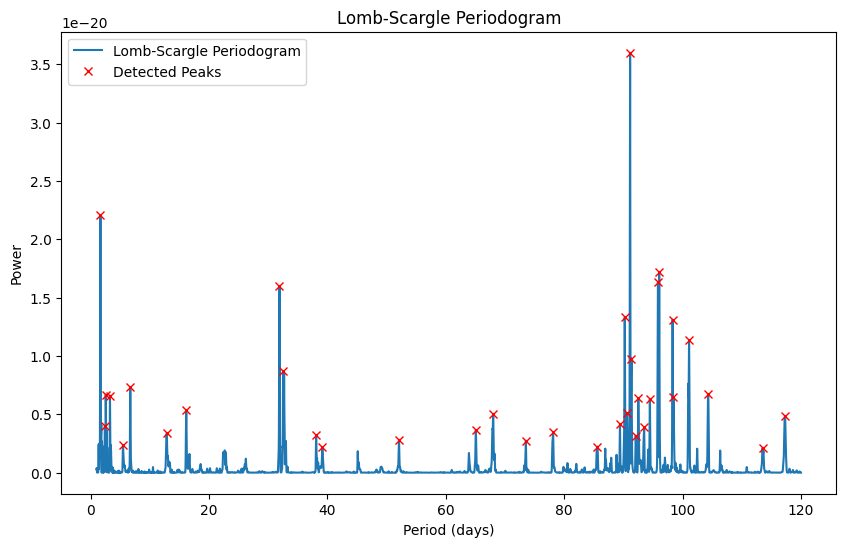

In [6]:
# period_range_zoom =(1,20)
# peaks_of_lightcurve_zoom = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=5000, period_range=period_range_zoom , list_of_random_lightcurves=cursed_list)

period_range_regular = (1 ,30)
peaks_of_lightcurve = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=200000, period_range=period_range_regular,list_of_random_lightcurves=cursed_list)

# add 2 sets of peak to the same array
#peaks_of_lightcurve = np.concatenate((peaks_of_lightcurve_zoom,peaks_of_lightcurve),axis=0)

In [7]:
print(len(peaks_of_lightcurve))
peaks_of_lightcurve_filt = courseworkb.remove_exact_duplicates(peaks_of_lightcurve,0.05, False)
print(len(peaks_of_lightcurve_filt))




results_list_no_filter = courseworkb.analyze_peaks_with_bls(
      kepler_dataframe["time"].values,
      kepler_dataframe["flux"].values,
      kepler_dataframe["error"].values,
      peaks_of_lightcurve_filt,
      10000
)





35
Adding period 1.658 days to the unique results.
Adding period 2.415 days to the unique results.
Adding period 2.558 days to the unique results.
Adding period 3.271 days to the unique results.
Adding period 5.473 days to the unique results.
Adding period 6.703 days to the unique results.
Adding period 12.851 days to the unique results.
Adding period 16.157 days to the unique results.
Adding period 31.899 days to the unique results.
Adding period 38.097 days to the unique results.
Adding period 52.087 days to the unique results.
Adding period 65.070 days to the unique results.
Adding period 73.516 days to the unique results.
Adding period 78.114 days to the unique results.
Adding period 85.618 days to the unique results.
Adding period 90.218 days to the unique results.
Adding period 95.826 days to the unique results.
Adding period 101.084 days to the unique results.
Adding period 113.490 days to the unique results.
19
Analyzing period 1.66 days...
Analyzing period 2.41 days...
Analyzi

In [8]:


print(f"Number of peaks found: {len(results_list_no_filter)}")

results_list = courseworkb.remove_duplicate_periods(results_list_no_filter,0.1,0.1, 0.2)

print(f"Number of peaks found after removing duplicates: {len(results_list)}")


Number of peaks found: 5
Adding period 1.541 days to the unique results.
Adding period 2.730 days to the unique results.
Adding period 3.244 days to the unique results.
Adding period 6.512 days to the unique results.
Adding period 15.671 days to the unique results.
Adding period 1.541 days to the final results.
Adding period 6.512 days to the final results.
Number of peaks found after removing duplicates: 2


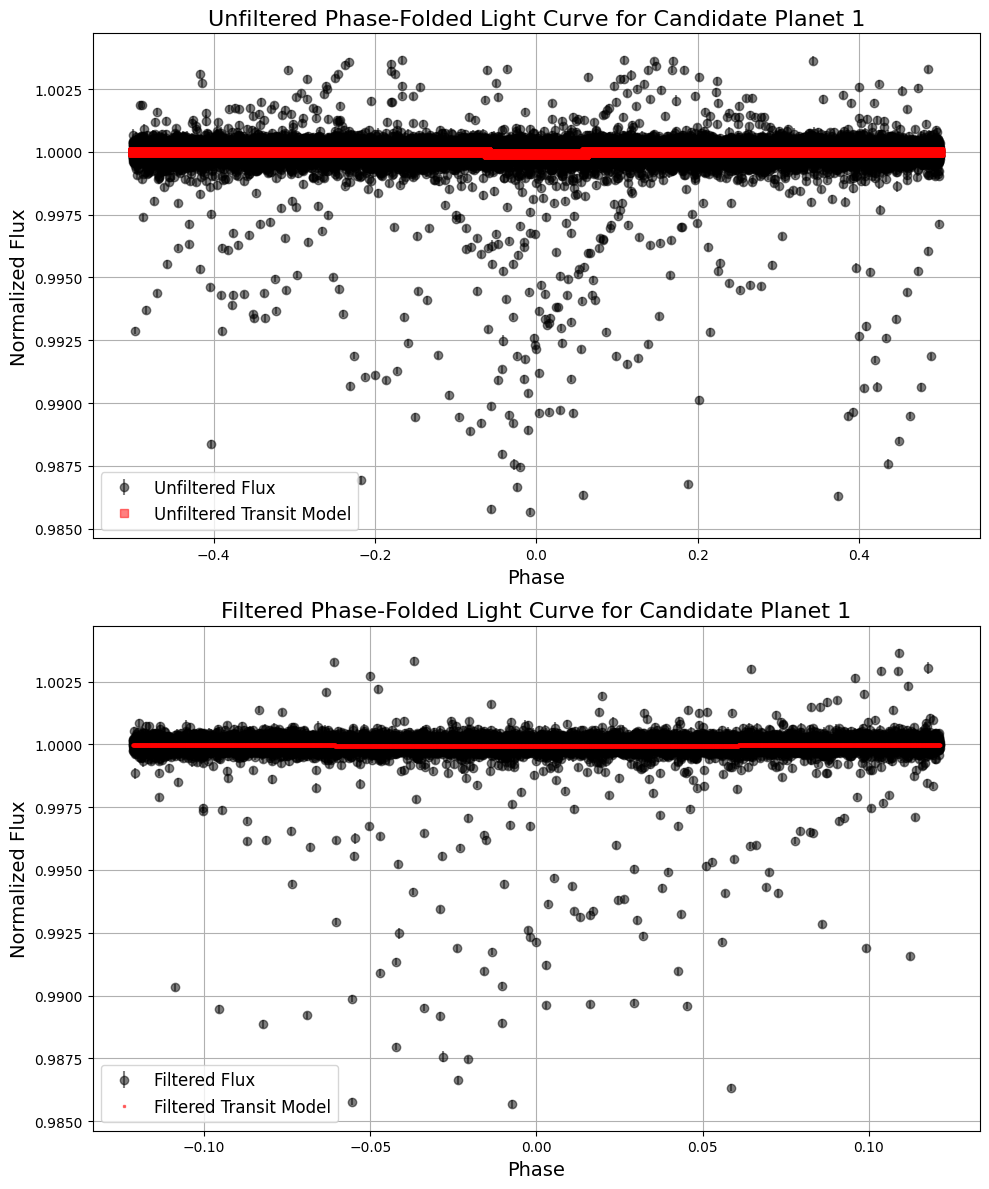

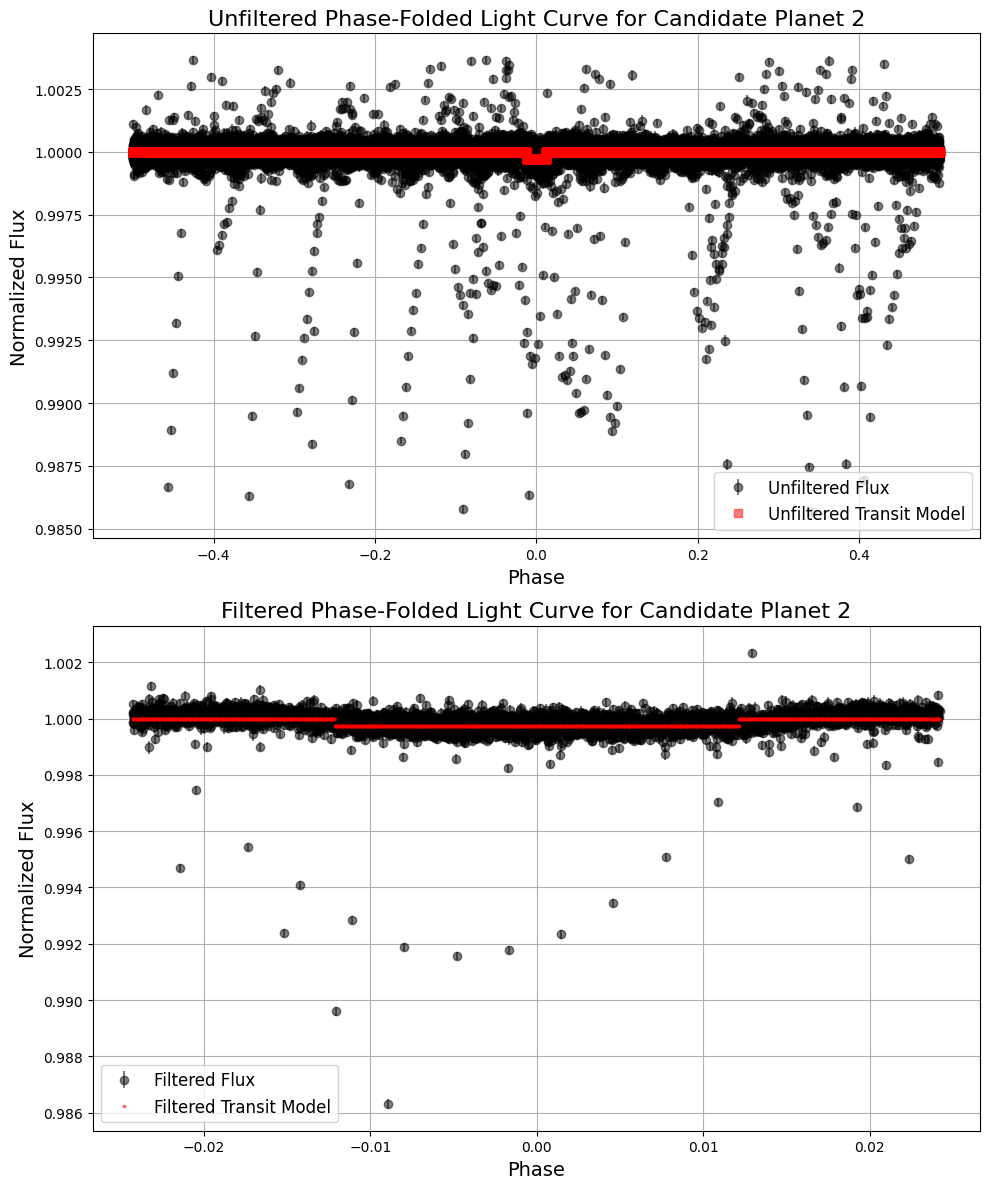

In [9]:
# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)
courseworkb.plot_phase_folded_light_curves(kepler_dataframe,results_list )

In [10]:
courseworkb.summarize_results(results_list,stellar_data)



Detected Planet Candidates:
----------------------------------------
Stellar Radius: 1.046 Solar Radii
Stellar Temperature: 5657 K
----------------------------------------

----------------------------------------
Candidate 1:
  Initial Period = 1.65 days
  Refined Period = 1.54 days
  Transit Depth  = 6.29e-05
  Transit Duration = 0.19 days
  Power = 651.49
----------------------------------------
Best Transit Candidate: Period = 1.54 days, Depth = 6.29e-05
Estimated Planet Radius: 0.008 Solar Radii
Estimated Planet Radius: 0.905 Earth Radii
Estimated Planet Radius: 0.083 Jupiter Radii

----------------------------------------
Candidate 2:
  Initial Period = 6.70 days
  Refined Period = 6.51 days
  Transit Depth  = 2.62e-04
  Transit Duration = 0.16 days
  Power = 2251.25
----------------------------------------
Best Transit Candidate: Period = 6.51 days, Depth = 2.62e-04
Estimated Planet Radius: 0.017 Solar Radii
Estimated Planet Radius: 1.848 Earth Radii
Estimated Planet Radius: 0.